In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import random
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


In [2]:
books_df = pd.read_csv('/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
print(books_df)
print(books_df.columns)

                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

In [3]:
books_df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


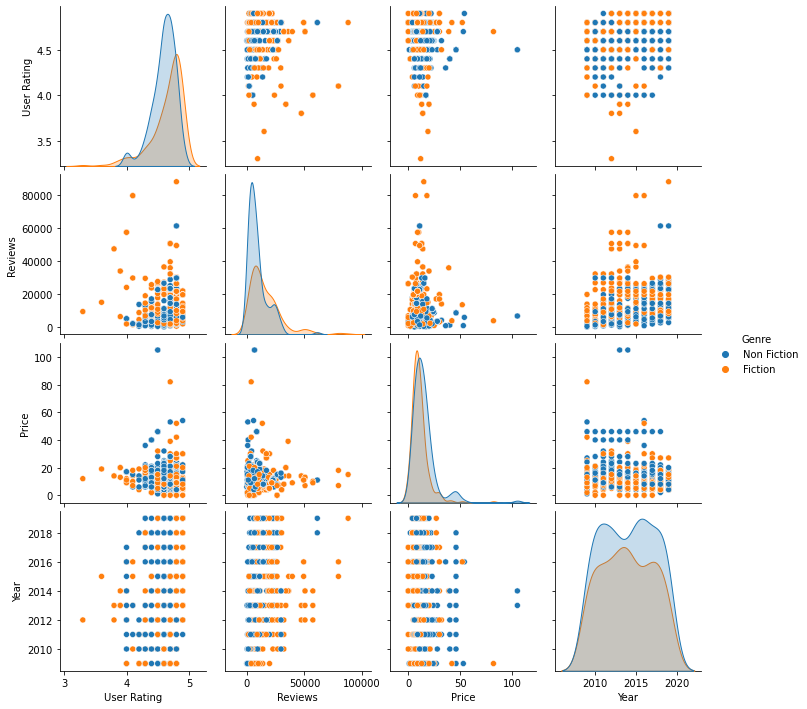

In [4]:
sns.pairplot(books_df,hue='Genre')

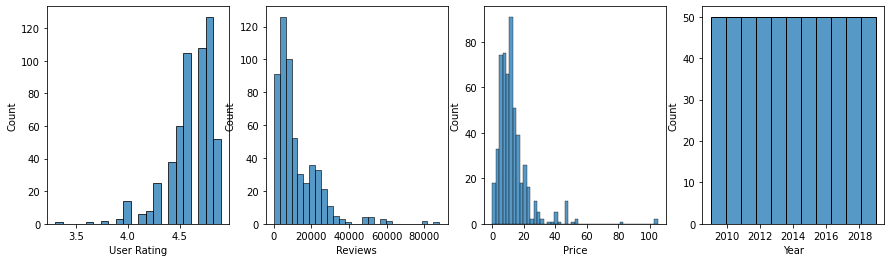

In [5]:
numerical_feature = [feature for feature in books_df.columns if books_df[feature].dtypes != 'O']
rows = 1
columns = 4
fig, axes = plt.subplots(rows,columns, figsize=(15,4))
y = 0
for column in numerical_feature:
    sns.histplot(x=books_df[column], ax=axes[y])
    y += 1

<AxesSubplot:xlabel='Year', ylabel='Reviews'>

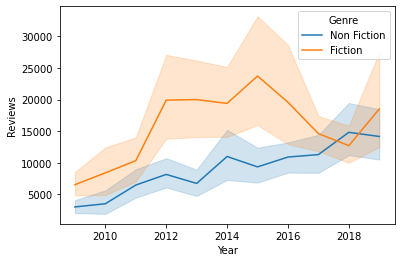

In [6]:
sns.lineplot(x='Year',y="Reviews",hue='Genre',data=books_df)

###### Fictional books received more number of reviews than non-fictional books. The trend of increasing reviews on fictional books have been dropped significantly between 2015-2018

In [7]:
genre_type = books_df.groupby('Genre')[['User Rating']].mean().index
rating_avg = books_df.groupby('Genre')[['User Rating']].mean().values.reshape(2)
print(rating_avg[1]-rating_avg[0])

-0.05317204301075229


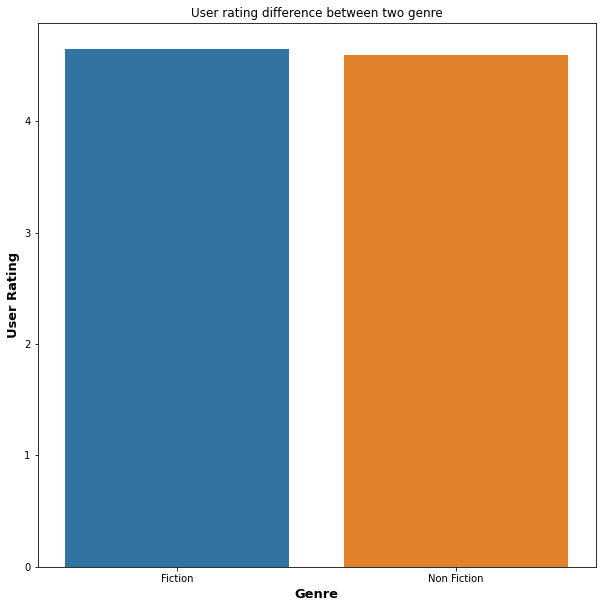

In [8]:
plt.figure(figsize=(10,10))
sns.barplot(x=genre_type,y=rating_avg)
plt.xlabel('Genre',fontweight='bold',fontsize=13)
plt.ylabel('User Rating',fontweight='bold',fontsize=13)
plt.title("User rating difference between two genre")
plt.show()

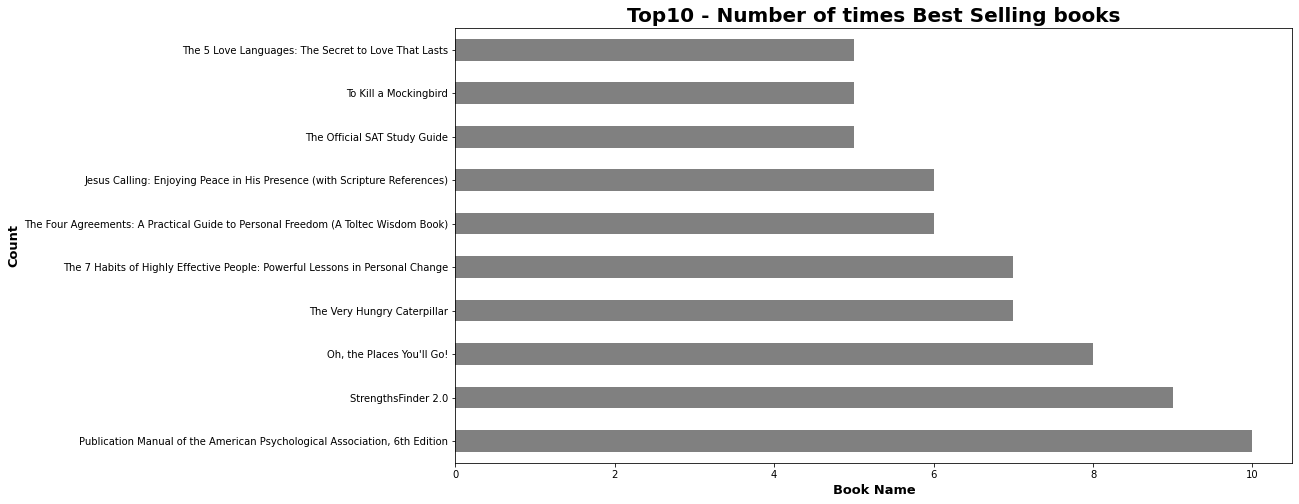

In [9]:
plt.figure(figsize=(15,8))
books_df['Name'].value_counts().head(10).plot(kind='barh',color='grey')
plt.xlabel('Book Name',fontweight="bold",fontsize=13)
plt.ylabel('Count',fontweight="bold",fontsize=13)
plt.title("Top10 - Number of times Best Selling books",fontweight="bold",fontsize=20)
plt.show()

##### "Publication Manual of the American Psychological Association, 6th Edition" has won most number of times best selling books.

#### Find out the missing values if any

In [10]:
for col in books_df.columns:
    print(books_df[col].isnull().any())

False
False
False
False
False
False
False


In [11]:
categorical_features = [feature for feature in books_df.columns if feature not in numerical_feature]
print(categorical_features)

['Name', 'Author', 'Genre']


<p>Remove the spaces at the start and at last from the Name column</p>

In [12]:
books_df['Name'] = books_df['Name'].str.title().str.strip()

<p>Let's remove the incorrect spelling</p>

In [13]:
authors = books_df['Author'].sort_values().unique()

<p>Let's remove duplicate author name if any using fuzzywuzzy</p>

In [14]:
import fuzzywuzzy
from fuzzywuzzy import process
matches_author_name = process.extract('George R. R. Martin',authors,limit=5, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
print(matches_author_name)

[('George R. R. Martin', 100), ('George R.R. Martin', 100), ('George Orwell', 53), ('Bill Martin Jr.', 52), ('Greg Mortenson', 52)]


In [15]:
books_df = books_df.replace('George R. R. Martin','George R.R. Martin')
books_df = books_df.replace('J. K. Rowling', 'J.K. Rowling')

In [16]:
# Delete the year column
del books_df['Year']

In [17]:
books_df1 = books_df.drop_duplicates()
print(books_df1)

                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules For Life: An Antidote To Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
538  Winter Of The World: Book Two Of The Century T...   
539  Women Food And God: An Unexpected Path To Almo...   
540                                             Wonder   
545       Wrecking Ball (Diary Of A Wimpy Kid Book 14)   
546  You Are A Badass: How To Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price        Genre  
0                    JJ Smith          4.7    17350      8  Non Fiction  
1                Stephen King          4.6     2052     22      Fiction  
2          Jordan B. Peterson          4.7    18979     15  Non Fiction  
3      

In [18]:
books_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 546
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         361 non-null    object 
 1   Author       361 non-null    object 
 2   User Rating  361 non-null    float64
 3   Reviews      361 non-null    int64  
 4   Price        361 non-null    int64  
 5   Genre        361 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 19.7+ KB


In [19]:
 import collections

In [20]:
count_books = collections.Counter(books_df1['Name'].tolist())
print(count_books.most_common(11))

[('The Help', 3), ('Gone Girl', 2), ("Quiet: The Power Of Introverts In A World That Can'T Stop Talking", 2), ('The 5 Love Languages: The Secret To Love That Lasts', 2), ('The 7 Habits Of Highly Effective People: Powerful Lessons In Personal Change', 2), ('The Fault In Our Stars', 2), ('The Girl On The Train', 2), ('The Immortal Life Of Henrietta Lacks', 2), ('To Kill A Mockingbird', 2), ('Unbroken: A World War Ii Story Of Survival, Resilience, And Redemption', 2), ('10-Day Green Smoothie Cleanse', 1)]


In [21]:
books_df1 = books_df1.drop_duplicates(subset='Name',keep='last')
books_df1

,Name,Author,User Rating,Reviews,Price,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction
...,...,...,...,...,...,...
538,Winter Of The World: Book Two Of The Century T...,Ken Follett,4.5,10760,15,Fiction
539,Women Food And God: An Unexpected Path To Almo...,Geneen Roth,4.2,1302,11,Non Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,Fiction
545,Wrecking Ball (Diary Of A Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,Fiction


<p>The author with hieghest rating</p>

In [22]:
top_13_authors = books_df1.groupby('Author')[['User Rating']].mean().sort_values('User Rating',ascending=False).head(13).reset_index()
print(top_13_authors)

                   Author  User Rating
0          Nathan W. Pyle          4.9
1         Bill Martin Jr.          4.9
2              Jill Twiss          4.9
3           Rush Limbaugh          4.9
4              Pete Souza          4.9
5             Sarah Young          4.9
6      Lin-Manuel Miranda          4.9
7          Patrick Thorpe          4.9
8              Dav Pilkey          4.9
9          Alice Schertle          4.9
10   Sherri Duskey Rinker          4.9
11            Chip Gaines          4.9
12  Emily Winfield Martin          4.9


In [23]:
books_df1.groupby('Author')[['User Rating']].mean().sort_values('User Rating',ascending=False).head(10).values

array([[4.9],
       [4.9],
       [4.9],
       [4.9],
       [4.9],
       [4.9],
       [4.9],
       [4.9],
       [4.9],
       [4.9]])

<p>The most number of best selling books written by the authors</p>

In [24]:
top10_authors = books_df1.groupby('Author')[['Name']].count().sort_values('Name',ascending=False).head(10).reset_index()
print(top10_authors)

             Author  Name
0       Jeff Kinney    12
1      Rick Riordan    10
2      J.K. Rowling     8
3   Stephenie Meyer     7
4        Dav Pilkey     6
5     Bill O'Reilly     6
6      John Grisham     5
7         E L James     5
8   Suzanne Collins     5
9  Charlaine Harris     4


 We take books with the number of reviews

In [25]:
top_reviewed_books = books_df.groupby('Name')[['Reviews']].sum().sort_values('Reviews',ascending=False).head(10).reset_index()
print(top_reviewed_books)

                                                Name  Reviews
0                             The Fault In Our Stars   201928
1                          Oh, The Places You'Ll Go!   174672
2                                          Gone Girl   171813
3                              The Girl On The Train   158892
4  Unbroken: A World War Ii Story Of Survival, Re...   148365
5  The 5 Love Languages: The Secret To Love That ...   145155
6  The Four Agreements: A Practical Guide To Pers...   139848
7                        The Very Hungry Caterpillar   136822
8                              To Kill A Mockingbird   131170
9              How To Win Friends & Influence People   125005


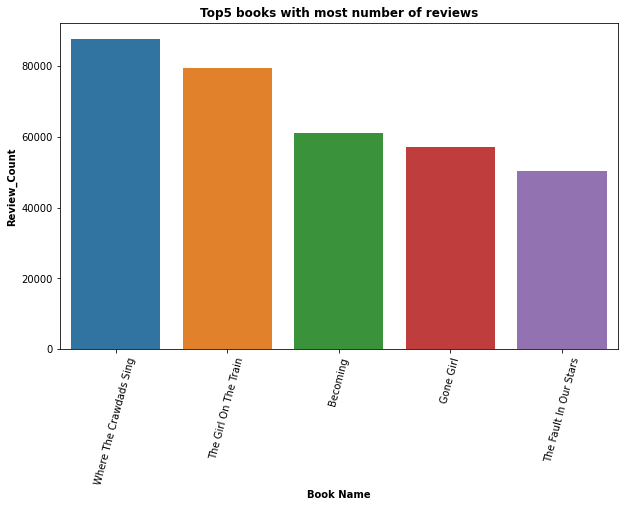

In [26]:
book_names = books_df1.groupby('Name')[['Reviews']].sum().sort_values('Reviews',ascending=False).head(5).index
no_of_reviews = books_df1.groupby('Name')[['Reviews']].sum().sort_values('Reviews',ascending=False).head(5).values.reshape(5)
plt.figure(figsize=(10,6))
sns.barplot(x=book_names,y=no_of_reviews)
plt.xlabel('Book Name',fontweight="bold",fontsize=10)
plt.ylabel('Review_Count',fontweight="bold",fontsize=10)
plt.title('Top5 books with most number of reviews',fontweight="bold")
plt.xticks(rotation=75)
plt.show()

In [27]:
books_df.head(10)

,Name,Author,User Rating,Reviews,Price,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction
5,A Dance With Dragons (A Song Of Ice And Fire),George R.R. Martin,4.4,12643,11,Fiction
6,A Game Of Thrones / A Clash Of Kings / A Storm...,George R.R. Martin,4.7,19735,30,Fiction
7,A Gentleman In Moscow: A Novel,Amor Towles,4.7,19699,15,Fiction
8,"A Higher Loyalty: Truth, Lies, And Leadership",James Comey,4.7,5983,3,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,Fiction


We take the number of books by genre


In [28]:
books_byGenre = books_df1.groupby('Genre')[['Name']].count().sort_values('Name',ascending=False).head(10).reset_index()

In [29]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig1 = make_subplots(rows=1,cols=1)
fig1.add_trace(go.Table(
    header=dict(values=top_13_authors.columns,
               line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[top_13_authors['Author'],
              top_13_authors['User Rating']],
              line_color='darkslategray',
               fill_color='lightcyan',
               align='left')
))
fig1.update_layout(showlegend=False, 
                    title_text='Top 13 best authors', 
                    title_font_size=16, 
                    title_font_family='Arial', 
                    title_x=0.5,
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

#### These 13 authors have received heighest rating of 4.9 for their published books. You should keep an eye to these authors.

In [30]:
fig2 = make_subplots(rows=1,cols=2,
                    specs=[[{'type': 'xy'}, {"type": "xy"}]],
                    subplot_titles=("Top 10 authors by number of bestsellers", 
                                      "Top 5 books by number of reviews"))
fig2.add_trace(go.Bar(x=top10_authors['Author'],
                     y=top10_authors['Name'],
                     name ='Count books',
                     marker_color=['#ff6666','#f76e6e', '#f07575', '#e87d7d', '#e08585',
                                     '#d98c8c', '#d19494', '#c99c9c', '#c2a3a3', '#baabab']),
                     row=1,col=1)
fig2.add_trace(go.Bar(x=top_reviewed_books['Name'],
                     y=top_reviewed_books['Reviews'],
                     name ='Reviews',
                     marker_color=['#ff6666','#f47171', '#e87d7d', '#dd8888', '#d19494']),
                     row=1,col=2)

#### From the above bar plot, we can see that the top 10 authors based on the total number of best selling novels have been written by them and top 10 books based on number of reviews have been given to the best selling books.

In [31]:
fig3 = make_subplots(rows=1,cols=1,
                    specs=[[{'type': 'domain'}]],
                      subplot_titles=(""))

fig3.add_trace(go.Pie(values=books_byGenre['Name'],
                     title='Genre',
                     labels=['Non Fiction', 'Fiction'],
                     textinfo='label+percent',
                     insidetextorientation='radial',
                     hole=0.3,
                     marker=dict(colors=['Gray','Salmon'], 
                                   line_color='Gray', 
                                   line_width=1),
                     textfont={'color': '#FFFFFF', 'size': 12},
                     textfont_size=12))

#### this pie chard shows us the percentage of best selling books based on genre. We can see that 54.3% of best selling books are categorized under non fiction books.

In [32]:
fig_4 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])
fig_4.add_trace(go.Box(x=books_df1['User Rating'],
                      name="User Rating"))
fig_4.update_traces(marker_color='Salmon')

In [33]:
fig_5 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])
fig_5.add_trace(go.Box(x=books_df1['Reviews'],
                      name="Reviews"))
fig_5.update_traces(marker_color='Salmon')

##### We can observe that the average of user rating is 4.6. Most of population lie between 4.5 and 4.8. There are outliers in the reviews distribution.

### Hypothesis Testing

##### We want to check if the genres differ in terms of rating. First we took the null hypothesis that there is no difference between two sub groups in this case. The alternate hypothesis is there is a difference between the two sub groups.
we calculated the difference between the mean of two groups: fiction and non fiction. Then we did testing and sampling 1000 times and find the percentage of all differences that are greater than the observed differences.


In [34]:
def diff_in_samples(dist1, dist2, gender1, gender2):
    print("The average rating "+str(len(dist1))+" "+gender1+" =",dist1.mean())
    print("The average rating "+str(len(dist2))+" "+gender2+"=",dist2.mean())
    diff_in_mean = dist1.mean()-dist2.mean()
    print("The difference between mean of "+gender1+" ratings and "+gender2+" ratings (diff_"+str(len(dist2))+")=",diff_in_mean)
    return diff_in_mean

In [35]:
def calculate_p_value(sample1, sample2, diff, alpha):
    #Step 2- Create list to store the average values of both the samples and the difference of them
    difference=[]
    #Sampling the data for 1000 times
    total_sample = list(sample1)
    total_sample.extend(sample2)
    total_sample = np.array(total_sample)
    for i in range(0,1000):
        #Picking 100 random numbers 
        samples = random.sample(range(0, len(total_sample)), 100)
        #First 50 random numbers are taken as set 1
        set1 = total_sample[samples[:50]].mean()
        #Next 50 random numbers are taken as set 2
        set2 = total_sample[samples[50:]].mean()
        #Taking the differnce between the two sets
        difference.append(set1 - set2)
        
    #Step3- Sorting the values and counting the number of values greater than the threshold
    difference.sort()
    count = sum(((i > diff) and (i>0)) for i in difference) 
    pValue = count/len(difference)
    print("Percentage of values greater than the difference",diff," =",pValue*100,"%")
    print("The pValue = ",pValue, "and the significance P(Reject H0 when H0 is true)=",alpha)
    if pValue>alpha:
        print("We fail to reject the null hypothesis")
    else:
        print("We can reject the null hypothesis")
    
    print('_'*50)
    return difference

For Sample Size:  200
The average rating 100 fiction books = 4.645
The average rating 100 Non fictional books= 4.588
The difference between mean of fiction books ratings and Non fictional books ratings (diff_100)= 0.056999999999999496
Percentage of values greater than the difference 0.056999999999999496  = 11.200000000000001 %
The pValue =  0.112 and the significance P(Reject H0 when H0 is true)= 0.05
We fail to reject the null hypothesis
__________________________________________________
For Sample Size:  400
The average rating 200 fiction books = 4.646999999999999
The average rating 200 Non fictional books= 4.5875
The difference between mean of fiction books ratings and Non fictional books ratings (diff_200)= 0.059499999999999
Percentage of values greater than the difference 0.059499999999999  = 11.600000000000001 %
The pValue =  0.116 and the significance P(Reject H0 when H0 is true)= 0.05
We fail to reject the null hypothesis
__________________________________________________


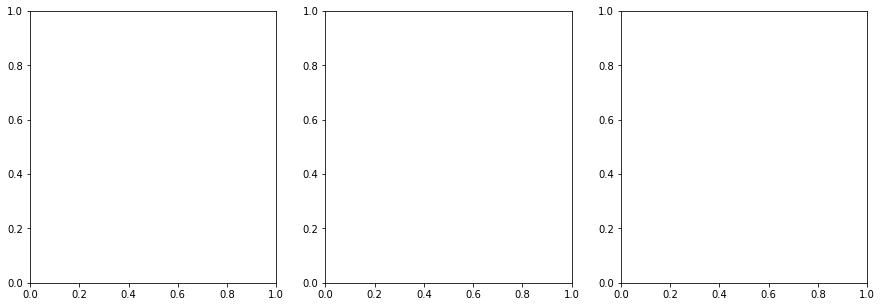

In [36]:
fiction_rating = np.array(books_df[books_df['Genre']=="Fiction"]['User Rating'].values)
non_fiction_rating = np.array(books_df[books_df['Genre']=="Non Fiction"]['User Rating'].values)
sample_sizes = [100,200]
alpha = 0.05
fig, axs = plt.subplots(1, 3,figsize=(15, 5))
for j, i in enumerate(sample_sizes):
    print("For Sample Size: ", 2*i)
    
    fRating_sample=fiction_rating[random.sample(range(0, fiction_rating.shape[0]), i)]
    NfRating_sample=non_fiction_rating[random.sample(range(0, non_fiction_rating.shape[0]), i)]
    
    diff_in_mean = diff_in_samples(fRating_sample,NfRating_sample, "fiction books", "Non fictional books")
    
    #Step 1- Combine both samples of size 50 each to a large sample of size 100 to simulate null hypothesis
    differences = calculate_p_value(fRating_sample, NfRating_sample,diff_in_mean, alpha)
    #plt_cdfplot_withthreshold(j, colrs[j],differences,threshold=diff_in_mean,sample=i)